# Лабораторная работа №1. 

Данная лабораторная работа состоит из нескольких блоков. В каждом блоке вам предлагается произвести некоторые манипуляции с данными и сделать некоторые выводы.
* Задавать вопросы можно и нужно.
* Списывать не нужно. Работы, которые были списаны обнуляются.
* Блоки выполняются последовательно и оцениваются отдельно.

__Вторая часть задания про градиентный бустинг и третья про SVM ждут вас в соседних ноутбуках.__

## Часть 1. Работа с моделями и ансамблями моделей в задачи классификации.

### 1. Чтение данных.
Воспользуемся [датасетом](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), в котором описываются различные автомобили. Будем решать задачу многоклассовой ($k=4$) классификации.
Для удобства, датасет уже преобразован в удобный формат.

In [69]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

from matplotlib import pyplot as plt


dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


Для первичного анализа может быть полезна библиотека `pandas`. Преобразуем `train` выборку в `pd.DataFrame`.

In [5]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,688,89,35,52,121,57,4,122,55,17,125,139,220,128,82,5,13,181,184
1,265,80,45,71,128,56,7,151,45,19,147,171,337,176,79,3,16,181,187
2,258,99,48,104,196,63,10,201,33,23,152,221,604,199,73,8,4,188,197
3,322,87,43,65,127,56,8,149,46,19,143,169,322,171,85,6,3,180,182
4,25,85,45,80,154,64,9,147,45,19,148,169,324,174,71,1,4,188,199
5,389,100,57,107,207,63,11,227,30,25,180,234,756,205,72,6,19,186,198
6,830,97,37,70,173,66,7,151,43,19,129,167,346,119,65,0,16,201,208
7,275,87,44,70,179,75,6,146,45,19,141,167,326,178,69,6,1,194,201
8,115,95,47,88,162,64,11,159,43,20,157,176,371,185,71,12,13,189,198
9,347,88,44,77,167,59,6,151,44,19,145,175,343,177,64,9,12,202,208


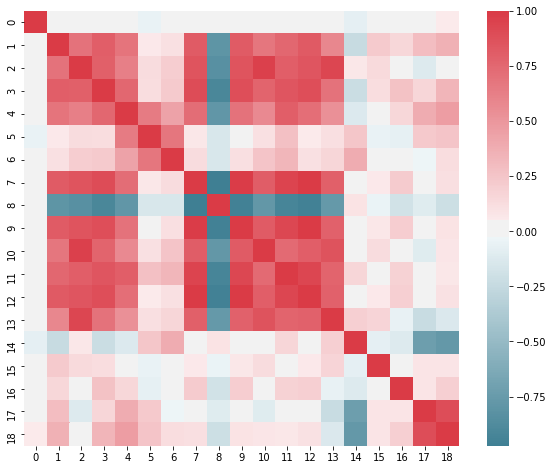

In [12]:
correlation_heatmap(X_train_pd)

Воспользовавшись методами `describe` и `info` можно получить полезную информацию о датасете.

In [13]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,413.834244,93.659381,44.865209,82.131148,169.003643,61.788707,8.630237,168.870674,40.890710,20.584699,147.956284,188.872495,439.919854,174.825137,72.571949,6.520947,12.788707,189.047359,195.693989
std,249.362237,8.215095,6.098346,15.564474,32.826685,8.075091,4.975109,33.030118,7.754142,2.583394,14.433269,31.510312,175.482549,31.973278,7.904587,4.988126,8.848841,6.130391,7.431265
min,1.000000,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,60.000000,0.000000,0.000000,176.000000,181.000000
25%,198.000000,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,147.000000,33.000000,19.000000,137.000000,167.000000,319.000000,150.000000,67.000000,2.000000,6.000000,185.000000,191.000000
50%,402.000000,93.000000,44.000000,80.000000,169.000000,62.000000,8.000000,157.000000,43.000000,20.000000,145.000000,179.000000,365.000000,173.000000,72.000000,6.000000,11.000000,189.000000,197.000000
75%,635.000000,100.000000,49.000000,98.000000,194.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,216.000000,586.000000,200.000000,75.000000,9.000000,19.000000,193.000000,201.000000
max,845.000000,119.000000,59.000000,110.000000,333.000000,138.000000,55.000000,261.000000,61.000000,28.000000,188.000000,320.000000,998.000000,264.000000,135.000000,22.000000,41.000000,203.000000,211.000000


In [14]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
0     549 non-null int64
1     549 non-null int64
2     549 non-null int64
3     549 non-null int64
4     549 non-null int64
5     549 non-null int64
6     549 non-null int64
7     549 non-null int64
8     549 non-null int64
9     549 non-null int64
10    549 non-null int64
11    549 non-null int64
12    549 non-null int64
13    549 non-null int64
14    549 non-null int64
15    549 non-null int64
16    549 non-null int64
17    549 non-null int64
18    549 non-null int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Работа с данными, построение модели, анализ ошибки.
Выполните следующие манипуляции с данными:

# Normalization

In [15]:
### YOUR CODE HERE
def normalized_column(data_column):
    init_col = np.array(data_column)
    return (init_col - min(init_col))/(max(init_col) - min(init_col))

def normalized_data(all_data):
    for col in all_data.columns:
        all_data[col] = normalized_column(all_data[col]) 
        #print(max(normalized_column(all_data[col])), min(normalized_column(all_data[col])))
        if True in set(np.isnan(normalized_column(all_data[col]))):
            print(col, 'NAN')
        if False in set(np.isfinite(normalized_column(all_data[col]))):
            print(col, 'INF')
    return all_data

# Standartization

In [16]:
def std_column(data_column):
    init_col = np.array(data_column)
    return (init_col - np.mean(init_col))/np.std(init_col)

def std_data(all_data):
    for col in all_data.columns:
        all_data[col] = std_column(all_data[col]) 
        #print(max(normalized_column(all_data[col])), min(normalized_column(all_data[col])))
        if True in set(np.isnan(std_column(all_data[col]))):
            print(col, 'NAN')
        if False in set(np.isfinite(std_column(all_data[col]))):
            print(col, 'INF')
    return all_data

In [17]:
X_train_pd = std_data(X_train_pd)

# Correlation

In [18]:
def correlation_features(all_data, border = 0.5):
    for col_1 in all_data.columns:
        for col_2 in all_data.columns[col_1+1:]:
            if abs(all_data.corr()[col_1][col_2]) > border:
                print(col_1, ' and ' , col_2, ' correlated with ', all_data.corr()[col_1][col_2])

def correlation_heatmap(all_data):
    
    from matplotlib import pyplot as plt
    import seaborn as sns
    
    f, ax = plt.subplots(figsize=(10, 8))
    corr = all_data.corr()
    sns.heatmap(corr, square=True, ax=ax, cmap=sns.diverging_palette(220, 10, as_cmap=True))
    


2  and  10  correlated with  0.9663790797632577
2  and  13  correlated with  0.9339152638520294
3  and  7  correlated with  0.9016078192846337
3  and  8  correlated with  -0.906051721978673
7  and  8  correlated with  -0.9736371556847249
7  and  9  correlated with  0.9922536040586821
7  and  11  correlated with  0.9392084590425371
7  and  12  correlated with  0.9963916076371879
8  and  9  correlated with  -0.9512075072405922
8  and  11  correlated with  -0.9264191357612895
8  and  12  correlated with  -0.9571783960456959
9  and  11  correlated with  0.924427565558556
9  and  12  correlated with  0.9927266225409603
11  and  12  correlated with  0.9373457789765364


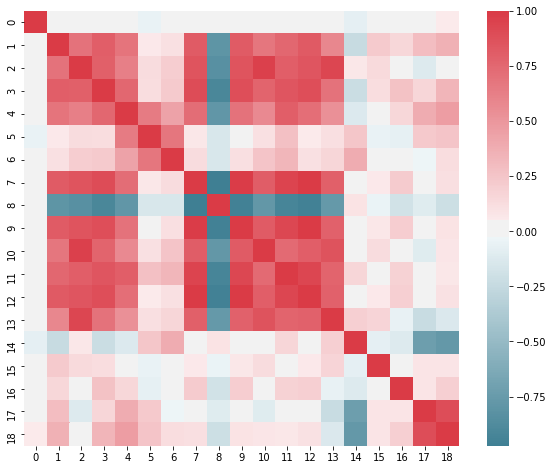

In [19]:
correlation_features(X_train_pd, 0.9)
correlation_heatmap(X_train_pd)

In [20]:
corr_list = [1, 2, 4, 6, 7, 8, 9, 10, 11, 12, 17, 18]
corr_list2 = [2, 8, 9, 11, 12]

In [21]:
def preprocessing(data, normal = True, std = True, correlation_list = []):
    data_pd = pd.DataFrame(data)
    if normal:
        data_pd = normalized_data(data_pd)
    
    if std:
        data_pd = std_data(data_pd)
    
    data_pd.drop(correlation_list, axis = 1)
        
    return data_pd[data_pd.columns].values

In [22]:
X_train_processed = preprocessing(X_train, normal = False, std = False,  correlation_list =  corr_list2)
X_test_processed = preprocessing(X_test, normal = False, std = False, correlation_list = corr_list2)

#### 2.0. Предобработка данных.
* Произведите необходимые (по вашему мнению) манипуляции с данными и объясните их.

In [70]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#standartization
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
#pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,1.100471,-0.567690,-1.619161,-1.937658,-1.463670,-0.593563,-0.931529,-1.420322,1.821240,-1.388858,-1.591962,-1.584179,-1.254372,-1.465844,1.193819,-0.305192,0.023900,-1.313896,-1.575055
1,-0.597404,-1.664234,0.022123,-0.715816,-1.250234,-0.717513,-0.327977,-0.541535,0.530431,-0.613977,-0.066316,-0.567712,-0.587031,0.036779,0.813947,-0.706509,0.363236,-1.313896,-1.170987
2,-0.625501,0.650691,0.514508,1.406331,0.823141,0.150140,0.275574,0.973615,-1.018540,0.935786,0.280422,1.020517,0.935875,0.756785,0.054202,0.296785,-0.994110,-0.171003,0.175906
3,-0.368612,-0.811367,-0.306134,-1.101661,-1.280725,-0.717513,-0.126794,-0.602141,0.659512,-0.613977,-0.343706,-0.631242,-0.672588,-0.119745,1.573692,-0.104533,-1.107222,-1.477167,-1.844434
4,-1.560737,-1.055043,0.022123,-0.137049,-0.457473,0.274091,0.074390,-0.662747,0.530431,-0.613977,0.003032,-0.631242,-0.661180,-0.025831,-0.199047,-1.107827,-0.994110,-0.171003,0.445284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544,1.714595,-0.080338,-0.962648,0.313104,0.426760,0.274091,-0.126794,0.003919,-0.114974,-0.226536,-0.967834,0.353461,-0.102211,-0.808447,-0.072423,0.096126,1.381246,-0.171003,-0.093473
545,-1.524612,-0.811367,-1.126776,0.184489,0.243815,-0.097761,-0.126794,-0.147596,-0.114974,-0.226536,-1.314572,-0.091244,-0.216286,-1.403235,-1.212040,-1.107827,1.381246,1.461702,1.253420
546,0.345860,0.894368,1.827536,1.149101,1.067067,0.026190,0.677942,1.761494,-1.405783,1.710667,2.083458,1.338163,1.808552,0.913309,0.054202,-1.308486,-0.202325,-0.497544,0.175906
547,-0.015390,-0.567690,0.022123,-0.329971,0.579214,0.274091,0.074390,-0.238505,0.014107,-0.226536,0.211074,0.035815,-0.284731,-0.025831,-0.832168,-0.505851,-1.220334,0.808620,0.714663


#### 2.1. Базовая логистическая регрессия.
* Подберите оптимальные параметры логистической регресии с помощью кросс-валидации на train-датасете (е переусердствуйте с подбором, в данной работе не стоит задача найти самую оптимальную модель. Небольшого grid/random search'а хватит).

* Постройте график ROC-кривой для данного классификатора (`sklearn.metrics.roc_curve`), оцените точность классификации и f1-score. 

In [71]:
### YOUR CODE HERE
from sklearn.model_selection import GridSearchCV
logistic = LogisticRegression(multi_class='ovr',n_jobs=10, max_iter = 1000, tol = 0.9)
parameters = { 'C': np.logspace(-3, 3, 30)}


In [72]:
lr_clf = GridSearchCV(logistic, parameters, scoring = 'accuracy' )
lr_clf.fit(X_train, y_train)

#lr_clf_proc = GridSearchCV(logistic, parameters, scoring = 'accuracy' )
#lr_clf_proc.fit(X_train_processed, y_train)

print('Non processed data accuracy : ',  accuracy_score(y_test, lr_clf.predict(X_test)))
     # '\nProcessed data accuracy : ', accuracy_score(y_test, lr_clf_proc.predict(X_test_processed)))

Non processed data accuracy :  0.7744107744107744


In [53]:
lr_clf = LogisticRegression(C = 1000, multi_class='ovr', n_jobs=10, max_iter = 1000, tol = 0.9)
lr_clf.fit(X_train, y_train)
predictions = lr_clf.predict(X_test)

print('Non processed data accuracy : ',  accuracy_score(y_test, predictions))

Non processed data accuracy :  0.797979797979798


In [54]:
#lr_clf_proc = LogisticRegression(C = 1000, multi_class='ovr', n_jobs=10, max_iter = 1000, tol = 0.9)
#lr_clf_proc.fit(X_train_processed, y_train)
#predictions = lr_clf.predict(X_test_processed)

#print('Processed data accuracy : ',  accuracy_score(y_test, predictions))

#### 2.2. Зависимость объясненной дисперсии от числа главных компонент.
Воспользуемся методом главных компонент (PCA). 

Примените его к train-части данных.
Постройте график зависимости объясненной дисперсии (explained variance ratio) от количества главных компонент.

In [63]:
### YOUR CODE HERE
from sklearn.decomposition import PCA

pca = PCA(n_components=12)

pca.fit(X_train)
print(sum(pca.explained_variance_ratio_))

0.992908234244721


In [57]:
def find_num_components(X_train):
    EVR = []
    for i in range(X_train.shape[1]):
        pca = PCA(i)
        pca.fit(X_train)
        EVR.append(sum(pca.explained_variance_ratio_))
        
    plt.figure(figsize=(16, 9))
    plt.plot(range(X_train.shape[1]), EVR)
    plt.show() 

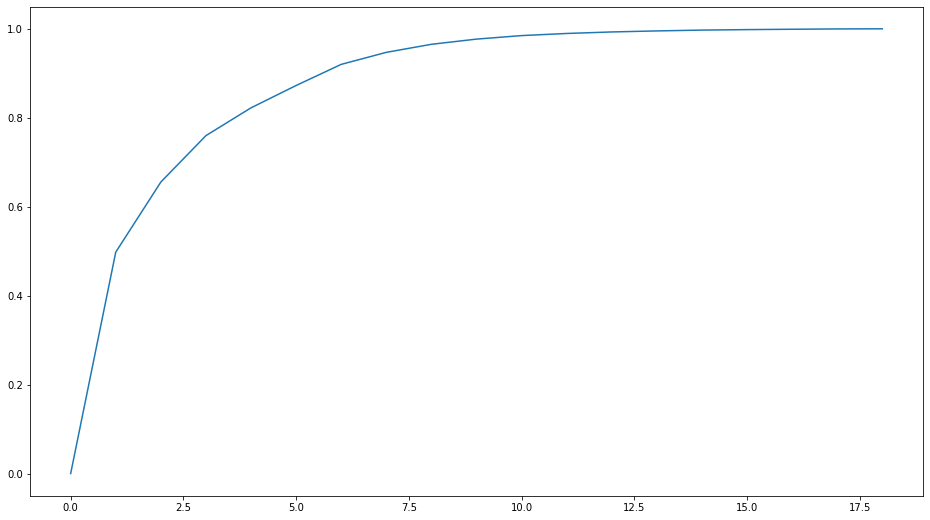

In [58]:
find_num_components(X_train)

#### 2.3. Преобразование с помощью PCA.
Выберите определенное число компонент. Кратко опишите, чем обусловлен ваш выбор.

Используя эти главные компоненты, преобразуйте train и test выборки (используя методы `fit` и `transform`).

In [83]:
pca = PCA(n_components=14)

pca.fit(X_train)
print(sum(pca.explained_variance_ratio_))

X_train_proc = pca.transform(X_train)
X_test_proc = pca.transform(X_test)

0.9971033460224871


#### 2.4. Логистическая регрессия над преобразованными данными.
* Подберите оптимальные параметры логистической регресии с помощью кросс-валидации на преобразованном train-датасете.

* Постройте график ROC-кривой для полученных классификаторов, оцените точность классификации и f1-score. 

In [84]:
logistic = LogisticRegression(multi_class='ovr',n_jobs=10, max_iter = 1000, tol = 0.9)
parameters = { 'C': np.logspace(-3, 3, 30)}

lr_clf = GridSearchCV(logistic, parameters, scoring = 'accuracy' )
lr_clf.fit(X_train_proc, y_train)

print('Non processed data accuracy : ',  accuracy_score(y_test, lr_clf.predict(X_test_proc)))

Non processed data accuracy :  0.7474747474747475


In [85]:
lr_clf = LogisticRegression(C = 1000, multi_class='ovr', n_jobs=10, max_iter = 1000, tol = 0.9)
lr_clf.fit(X_train_proc, y_train)
predictions = lr_clf.predict(X_test_proc)

print('Non processed data accuracy : ',  accuracy_score(y_test, predictions))

Non processed data accuracy :  0.7441077441077442


#### 2.5. Решающее дерево.
Рассмотрим поведение решающего дерева на исходных и преобразованных данных. Будем варьировать лишь один параметр - максимальную глубину дерева. 

* С помощью кросс-валидации подберите оптимальный параметр `max_depth` и оцените на исходных и преобразованных данных те же метрики, что и выше.

In [13]:
from sklearn.tree import DecisionTreeClassifier

# YOUR CODE HERE

#### 2.6. Bagging.
Перейдем к ансамблям. 

Для построения ансамбля воспользуемся Bagging'ом с числом алгоритмов от 2 до 50. В качестве первого семейства базовых алгоримтов будем использовать линейные модели (т.е. логистическую регрессию), в качестве второго - решающие деревья. 

*Пояснение: Будем строить ансамбль только из моделей из одного семейства, т.е. логистическая регрессия не смешивается с решающими деревьями.*

Для этого можно сгенерировать с помощью метода bootstrap 50 подвыборок из `train` выборки (того же размера, что и исходная), обучить логистическую регрессию и решающее дерево с оптимальными параметрами из предыдущего пункта на каждой из подвыборок и затем усреднить предсказания k моделей.

*Hint: в sklearn может найтись подходящая функция, которая облегчит вам реализацию данного пункта.*

* Постройте график качества классификации и f1-score на `train` и `test` датасетах в зависимости от числа алгоритмов, вошедших в ансамбль.

* Проанализируйте график. Какое количество моделей стоит использовать? Как вы думаете, являются ли параметры решающего дерева, подобранные в предыдущем пункте оптимальными в данном случае?

In [ ]:
# YOUR CODE HERE

#### 2.7. Random Forest.
Теперь воспользуйтесь `sklearn`-реализацией алгоритма Random Forest. 

* Постройте аналогичные графики для него (изменяя число деревьев от 1 до 50). Остальные параметры можно оставить по умолчанию.

* Проанализируйте полученные результаты. Каким получилось оптимальное число деревьев. Как оно соотносится с оптимальным числом деревьев и линейных моделей в bagging'е из предыдущего пункта?

In [173]:
from sklearn.ensemble import RandomForestClassifier

# YOUR CODE HERE

#### 2.8. Кривая обучения.
* Поделите обучающую выборку на 10 примерно равных частей. Обучите логистическую регрессию (с оптимальными параметрами), решающее дерево (аналогично), бэггинг над логистическими регрессиями и решающими деревьями (с выбранными параметрами) и RandomForest (из предыдущего пункта) на одной, двух, трех и т.д. частях.

* Постройти график f1-score и accuracy на `train` и `test` датасетах в зависимости от размера обучающей выборки.

* Проанализируйте полученный график. Можно ли сделать из него какие-либо выводы? Если да - кратко опишите их.

In [ ]:
# YOUR CODE HERE